**대한민국 연도별 특허 출원, 등록 건수 변화 및, 1인당 GDP, 수출 통계와의 비교

현재 대한민국은 중국, 미국, 일본에 이어 세계에서 네번째로 많은 특허를 출원하는 국가이며, 세계지식재산권기구(WIPO)와 파리협약, PCT 등 다양한 국제 조약에 가입하고 있다. 또한, 한국어는 국제공개어로 채택되었을 정도로 대한민국은 전세계적으로 특허와 관련하여 영향력이 높은 나라이다. 그러나 1950년대 초반만 하더라도 우리나라의 특허 출원 수는 연 1000건이 채 되지 않았고, 특허 등록 건수는 연 100건 이하였다. 대한민국이 어떠한 과정을 거쳐 현재 연 200000건이 넘는 특허 대국이 되었는지 선형회귀를 이용하여 분석하도록 하겠다. 또한, 특허가 "발명을 보호, 장려하고 그 이용을 도모함으로써 기술의 발전을 촉진하여 산업발전에 이바지함"(특허법 1조)라는 본래의 목적에 맞추어 실제로 대한민국의 경제발전에 이바지하였는지 확인하기 위하여 1인당 GDP, 수출 통계와의 비교도 진행하겠다.

특허관련 데이터는 특허청 사이트에서 얻었다. 
https://www.kipo.go.kr/kpo/HtmlApp?c=3041&catmenu=m04_05_02

1인당 gdp 데이터는 KOSIS 사이트에서 얻었다. 
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2AS017&conn_path=I2

연도별 수출액 데이터는 산업통계 분석시스템(ISTANS)에서 얻었다.
https://istans.or.kr/co/newCoTab.do?scode=S254

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

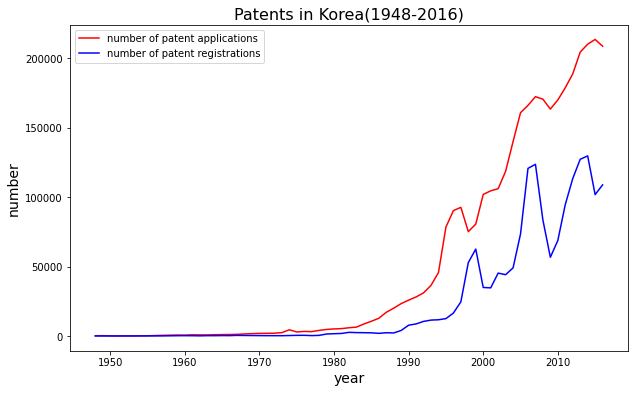

In [4]:
#%% 데이터 정리

application_file = pd.read_csv('korea_patent_application.csv') # 연도별 특허 출원 건수 파일
registration_file = pd.read_csv('korea_patent_registration.csv') # 연도별 특허 등록 건수 파일
# print(application_file)
# print(registration_file)

year = np.array(application_file.year.tolist(), dtype = float)
app_num = np.array(application_file.application.tolist(), dtype = float)
reg_num = np.array(registration_file.registration.tolist(), dtype = float)
# print(year)
# print(app_num)
# print(reg_num)

plt.figure(figsize = (10,6))
ax = plt.gca()
ax.set_facecolor('w')
plt.plot(year, app_num, c = 'r', linestyle = '-')
plt.plot(year, reg_num, c = 'b', linestyle = '-')
plt.legend(['number of patent applications', 'number of patent registrations'])
plt.xlabel('year', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.title('Patents in Korea(1948-2016)', fontsize = 16)
plt.show()

In [5]:
#%% Linear regression

x = year[42:] # 1990~2016
# print(x)
y1 = app_num[42:]
y2 = reg_num[42:]

# 먼저 sklearn 모듈을 사용하지 않고 수업시간에 배운대로 기울기(w)와 절편(b)을 구해보도록 하겠다.
w1 = np.mean((y1 - np.mean(y1)) * (x - np.mean(x))) / np.mean((x - np.mean(x))**2)
w2 = np.mean((y2 - np.mean(y2)) * (x - np.mean(x))) / np.mean((x - np.mean(x))**2)
b1 = np.mean(y1) - w1 * np.mean(x)
b2 = np.mean(y2) - w2 * np.mean(x)
print(w1, w2, b1, b2)

# 이번에는 sklearn 모듈을 사용하여 기울기와 절편을 구해보겠다.
linear_regression1 = LinearRegression().fit(x[:, np.newaxis], y1)
linear_regression2 = LinearRegression().fit(x[:, np.newaxis], y2)
w1_sklearn = linear_regression1.coef_
w2_sklearn = linear_regression2.coef_
b1_sklearn = linear_regression1.intercept_
b2_sklearn = linear_regression2.intercept_
print(w1_sklearn, w2_sklearn, b1_sklearn, b2_sklearn) # 동일한 결과

# 이제 위에서 구한 w와 b의 score를 구해보겠다.(a.k.a R^2)
def score(x, y, w, b):
    delta_y = y - w * x - b
    score = 1 - np.sum(delta_y**2) / np.sum((y - np.mean(y))**2)
    return score
score1 = score(x, y1, w1, b1)
score2 = score(x, y2, w2, b2)
print(score1)
print(score2)

# sklearn을 이용한 score는 다음과 같다.
score1_sklearn = linear_regression1.score(x[:, np.newaxis], y1)
score2_sklearn = linear_regression2.score(x[:, np.newaxis], y2)
print(score1_sklearn)
print(score2_sklearn)  # 동일한 결과

7641.826007326007 4745.358363858363 -15181939.677859178 -9444562.32132682
[7641.82600733] [4745.35836386] -15181939.67785918 -9444562.321326824
0.9670007582982467
0.8018399840878195
0.9670007582982467
0.8018399840878203


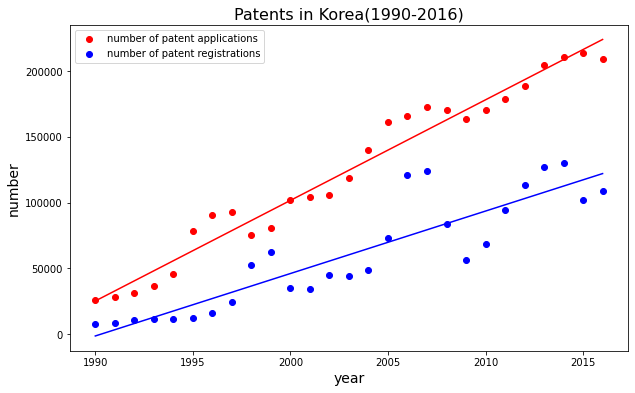

In [6]:
#%% linear regression plot

plt.figure(figsize = (10,6))
ax = plt.gca()
ax.set_facecolor('w')
plt.scatter(x, y1, c = 'r')
plt.scatter(x, y2, c = 'b')
plt.legend(['number of patent applications', 'number of patent registrations'])

x_plot = list(range(1990, 2017))
y1_plot = np.dot(w1 , x_plot) + b1
y2_plot = np.dot(w2 , x_plot) + b2
plt.plot(x_plot, y1_plot, c = 'r')
plt.plot(x_plot, y2_plot, c = 'b')

plt.xlabel('year', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.title('Patents in Korea(1990-2016)', fontsize = 16)
plt.show()

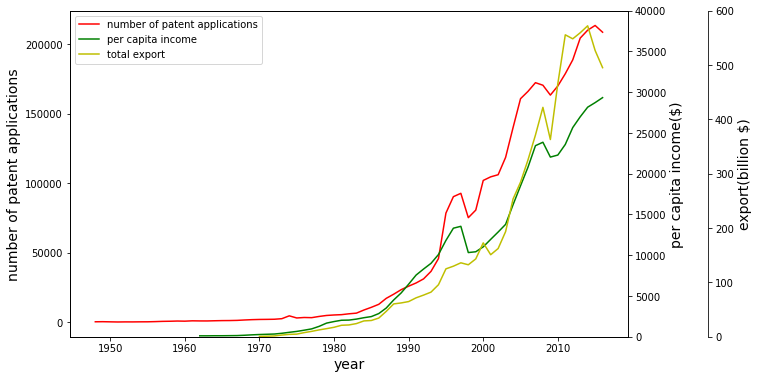

In [60]:
# %% 경제 데이터 정리

income_file = pd.read_csv('korea_per_capita_income.csv') # 연도별 1인당 gdp 파일 - 1962 ~ 2016
export_file = pd.read_csv('korea_export.csv') # 연도별 수출액 파일 - 1970 ~ 2016
# print(income_file)
# print(export_file)

income = np.array(income_file.per_capita_income.tolist(), dtype = float)
year_i = np.array(income_file.year.tolist(), dtype = float)
export = np.array(export_file.export.tolist(), dtype = float)
year_e = np.array(export_file.year.tolist(), dtype = float)
# print(income)
# print(export)


fig, host = plt.subplots(figsize = (10, 6))
par1 = host.twinx()
par2 = host.twinx()

par1.set_ylim(0, 40000)
par2.set_ylim(0, 600)

host.set_xlabel('year', fontsize = 14)
host.set_ylabel('number of patent applications', fontsize = 14)
par1.set_ylabel('per capita income($)', fontsize = 14)
par2.set_ylabel('export(billion $)', fontsize = 14)

p1, = host.plot(year, app_num, c = 'r', label = 'number of patent applications')
p2, = par1.plot(year_i, income, c = 'g', label = 'per capita income')
p3, = par2.plot(year_e, export, c = 'y', label = 'total export')
lns = [p1, p2, p3]

host.legend(handles=lns)
par2.spines['right'].set_position(('outward', 80))
plt.show()

위의 plot을 보면 특허 출원건수와 1인당 gdp, 수출액 통계가 서로 연관이 있는 것을 알 수 있다. 특히, 1997년 IMF 위기와 2008년 금융 위기에 의해 1인당 gdp와 수출액이 감소하는 시기가 있었는데, 그 시기에 맞추어 특허의 출원건수 역시 감소한 것을 볼 수 있다. 

In [17]:
#%% linear regression

year_income = year[14:] # 1962~2016
# print(year_income)
x_income = app_num[14:]
y_income = income

year_export = year[22:] # 1970~2016
# print(year_export)
x_export = app_num[22:]
y_export = export

w_income = np.mean((y_income - np.mean(y_income)) * (x_income - np.mean(x_income))) / np.mean((x_income - np.mean(x_income))**2)
w_export = np.mean((y_export - np.mean(y_export)) * (x_export - np.mean(x_export))) / np.mean((x_export - np.mean(x_export))**2)
b_income = np.mean(y_income) - w_income * np.mean(x_income)
b_export = np.mean(y_export) - w_export * np.mean(x_export)
print(w_income, w_export, b_income, b_export)

score_income = score(x_income, y_income, w_income, b_income)
score_export = score(x_export, y_export, w_export, b_export)
print(score_income)
print(score_export)

0.12670927116622926 0.002412541735080273 942.5885797372348 -12.360886289676273
0.9769906251267053
0.9295474745101912


1인당 gdp와 특허 출원 건수를 선형 회귀 분석한 결과, R^2이 0.977, 수출액과 특허 출원 건수를 선형 회귀 분석한 결과, R^2이 0.930이 나왔다. 이로써 경제발전(산업발전)과 특허 출원이 서로 연관이 있다고 해석할 수 있다. 또한, 대한민국의 특허 제도가 "발명을 보호, 장려하고 그 이용을 도모함으로써 기술의 발전을 촉진하여 산업발전에 이바지함"(특허법 1조)라는 본래 목적에 잘 맞추어 이루어지고 있다고 해석한다. 특허를 공개함으로써 산업이 발전하고, 이는 다시 더 좋은 발명을 만드는 원동력이 되며 선순환을 이루었다.

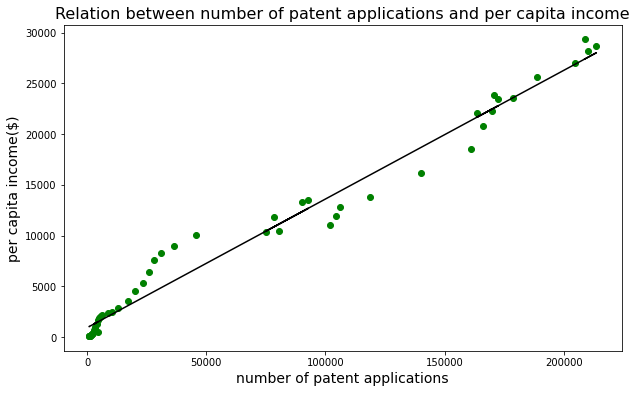

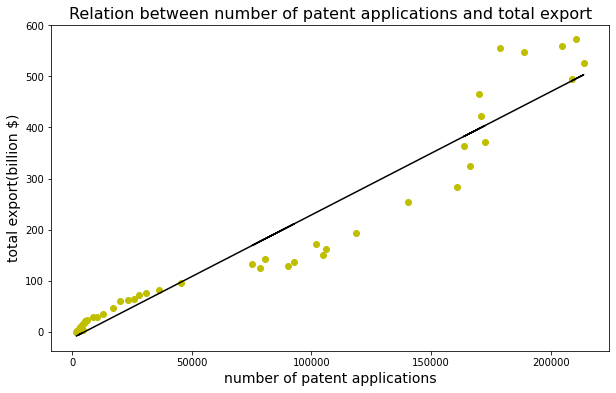

In [61]:
#%% economy linear regression plot

# 1인당 gdp와 특허 출원건수의 관계 plot
plt.figure(figsize = (10,6))
ax = plt.gca()
ax.set_facecolor('w')
plt.scatter(x_income, y_income, c = 'g')

x_income_plot = x_income
y_income_plot = np.dot(w_income , x_income_plot) + b_income
plt.plot(x_income_plot, y_income_plot, c = 'k')

plt.xlabel('number of patent applications', fontsize = 14)
plt.ylabel('per capita income($)', fontsize = 14)
plt.title('Relation between number of patent applications and per capita income', fontsize = 16)
plt.show()


# 수출액과 특허 출원건수의 관계 plot
plt.figure(figsize = (10,6))
ax = plt.gca()
ax.set_facecolor('w')
plt.scatter(x_export, y_export, c = 'y')

x_export_plot = x_export
y_export_plot = np.dot(w_export , x_export_plot) + b_export
plt.plot(x_export_plot, y_export_plot, c = 'k')

plt.xlabel('number of patent applications', fontsize = 14)
plt.ylabel('total export(billion $)', fontsize = 14)
plt.title('Relation between number of patent applications and total export', fontsize = 16)
plt.show()